<h2><span style="color:gray">ipyrad-analysis toolkit:</span> Popgen summary statistics</h2>

Calculate summary statistics such as pi, Tajima's D, Fst

In [109]:
!hostname

goatzilla


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import ipyrad
import ipyrad.analysis as ipa
import ipyparallel as ipp
from ipyrad.analysis.popgen import Popgen
from ipyrad import Assembly
from ipyrad.analysis.locus_extracter import LocusExtracter

ipyclient = ipp.Client(cluster_id="popgen")
print(len(ipyclient))

19


In [3]:
# popgen tools can accept either an ipyrad assembly
data = ipyrad.load_json("/tmp/ipyrad-test/watdo.json")

# or alternatively the path to your VCF or HDF5 formatted snps file
#data = "/tmp/ipyrad-test/watdo_outfiles/watdo.snps.hdf5"

loading Assembly: watdo
from saved path: /tmp/ipyrad-test/watdo.json


In [4]:
imap = {
    "pop1" : ["1A_0", "1B_0", "1C_0", "1D_0"],
    "pop2" : ["2E_0", "2F_0", "2G_0", "2H_0"],
    "pop3" : ["3I_0", "3J_0", "3K_0", "3L_0"],
}

In [525]:
popgen = Popgen(data=data, imap=imap)
popgen.samples
popgen.params

imap      {'pop1': ['1A_0', '1B_0', '1C_0', '1D_0'], 'pop2': ['2E_0', '2F_0', '2G_0', '2H_0'], 'pop3': ['3I_0', '3J_0', '3K_0', '3L_0']}
workdir   ~/ipyrad/ipyrad/newdocs/API-analysis/analysis-popgen

In [529]:
from IPython.display import display
popgen.run(ipyclient=ipyclient)
popgen.results

Parallel connection | goatzilla: 19 cores
[locus filter] full data: 1000
[locus filter] post filter: 1000
[####################] 100% 0:00:10 | Calculating sumstats for nloci 1000 
[####################] 100% 0:00:05 | Collating sumstats for npops 3 


within         mean_pi mean_Watterson mean_TajimasD
pop1  0.00853        0.00684         0.618
pop2  0.00912        0.00748         0.552
pop3  0.00934        0.00751         0.631

In [516]:
display(popgen.results)

within         mean_pi mean_Watterson mean_TajimasD
pop1  0.00853        0.00684         0.618
pop2  0.00912        0.00748         0.552
pop3  0.00934        0.00751         0.631

In [14]:
from ipyrad.analysis.locus_extracter import LocusExtracter
import ipyparallel as ipp
ipyclient = ipp.Client(cluster_id="popgen")
print(len(ipyclient))
lex = LocusExtracter(
            data=data.seqs_database,
            imap=imap,
            mincov=len(imap),  # ENFORCE at least 1 per spp.
        )
lex.run(ipyclient=ipyclient)

40
[locus filter] full data: 1000
[locus filter] post filter: 1000


In [406]:
print(len(popgen.lex.loci))
popgen.lex.get_locus(1, as_df=True)

1000


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
1B_0,84,71,67,65,71,67,71,65,65,71,...,67,67,71,71,65,84,65,71,65,71
2H_0,84,71,67,65,71,67,71,65,65,71,...,67,67,71,71,65,84,65,71,65,71
3J_0,84,71,67,65,71,67,71,65,65,71,...,67,67,71,71,65,84,65,71,65,71
2E_0,84,71,67,65,71,67,71,65,65,71,...,67,67,71,71,65,84,65,71,65,71
1C_0,84,71,67,65,71,67,71,65,65,71,...,67,67,71,71,65,84,65,71,65,71
1A_0,84,71,67,65,71,67,71,65,65,71,...,67,67,71,71,65,84,65,71,65,71
2G_0,84,71,67,65,71,67,71,65,65,71,...,67,67,71,71,65,84,65,71,65,71
3L_0,84,71,67,65,71,67,71,65,65,71,...,67,67,71,71,65,84,65,71,65,71
2F_0,84,71,67,65,71,67,71,65,65,71,...,67,67,65,71,65,84,65,71,65,71
3I_0,84,71,67,65,71,67,71,65,65,71,...,67,67,65,71,65,84,65,71,65,71


In [77]:
import pandas as pd
wat = pd.DataFrame()
with h5py.File(data.snps_database, 'r') as io5:
    diffs = io5["snps"][0] != io5["snps"][1]
    for idx, name in enumerate(io5["snps"].attrs["names"]):
        wat[name.decode("utf-8")] = io5["snps"][idx]
wat["1A_0"]

0       71
1       67
2       65
3       65
4       67
        ..
4500    84
4501    84
4502    65
4503    71
4504    65
Name: 1A_0, Length: 4505, dtype: uint8

In [169]:
import h5py
with h5py.File(data.seqs_database, 'r') as io5:
    print(io5.keys())
    print(io5["phymap"].attrs.keys())
    print(io5["phymap"].attrs["phynames"])
    print(io5["phy"][0])

<KeysViewHDF5 ['phy', 'phymap', 'scaffold_lengths', 'scaffold_names']>
<KeysViewHDF5 ['columns', 'phynames', 'reference']>
[b'1B_0' b'2H_0' b'3J_0' b'2E_0' b'1C_0' b'1A_0' b'2G_0' b'3L_0' b'2F_0'
 b'3I_0' b'1D_0' b'3K_0']
[84 71 67 ... 65 84 84]


## Development of the Processor class to calculate all the stats

In [409]:
from collections import Counter
from itertools import combinations
import numpy as np
# Make a processor and give it some data
loci = [lex.get_locus(x, as_df=True) for x in range(2)]
proc = ipa.popgen.Processor(popgen.params, 0, loci)
proc.run()
#proc._pi()
locus = loci[0]
#locus[10][:5] = 82
#display(locus)
#%timeit proc.pi(locus)
print(proc.pi(locus))
print(proc.Watterson(locus))
print(proc.TajimasD(locus))
print(proc.results)

{'pi': 1.3731884057971016, 'pi_per_base': 0.01508998248128683, 'site_pi': {10: 0.391304347826087, 22: 0.08333333333333333, 24: 0.2898550724637681, 29: 0.15942028985507245, 55: 0.2898550724637681, 86: 0.15942028985507245}}
{'w_theta': 1.9334813592029851, 'w_theta_per_base': 0.021247047903329506}
-1.0754822338797905
Dxy         {0:       pop1   pop2   pop3
pop1   0.0  0.027  0.031
pop2   0.0  0.000  0.025
pop3   0.0  0.000  0.000, 1:       pop1   pop2   pop3
pop1   0.0  0.023  0.024
pop2   0.0  0.000  0.025
pop3   0.0  0.000  0.000}
Fst         {0: {'Fst':       pop1   pop2   pop3
pop1   0.0  0.269  0.417
pop2   0.0  0.000  0.208
pop3   0.0  0.000  0.000, 'Fst_adj':       pop1   pop2   pop3
pop1   0.0  0.197  0.323
pop2   0.0  0.000  0.149
pop3   0.0  0.000  0.000, 'Fst_Nm':       pop1   pop2   pop3
pop1   0.0  0.905  0.467
pop2   0.0  0.000  1.267
pop3   0.0  0.000  0.000}, 1: {'Fst':       pop1   pop2   pop3
pop1   0.0  0.167  0.214
pop2   0.0  0.000  0.208
pop3   0.0  0.000  0.000, 'F

## Prototyping the dcons function to split alleles per base

In [213]:
from ipyrad.assemble.utils import DCONS
import pandas as pd
import itertools
p1 = popgen.imap["pop1"]
#locus.loc[p1, :].apply(lambda x: [DCONS[y] for y in x])
cts = np.array(locus.apply(lambda bases:\
                Counter(x for x in bases if x not in [45, 78])))
snps = np.array([len(x) for x in cts]) > 1
cts = cts[snps]

def dcons(counter):
    new = list(itertools.chain(*[DCONS[x]*ct for x, ct in counter.items()]))
    return Counter(new)
print(cts)
%timeit list(map(dcons, cts))

[Counter({82: 5, 71: 4, 84: 3}) Counter({67: 11, 83: 1})
 Counter({84: 10, 65: 2}) Counter({65: 11, 84: 1})
 Counter({67: 10, 84: 2}) Counter({84: 11, 71: 1})]
42.7 µs ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Loading pickled results

In [398]:
ipyrad.analysis.popgen._calc_sumstats(popgen, 10, loci)

In [399]:
import pickle
!ls analysis-popgen/
with open("analysis-popgen/0.p", 'rb') as inp:
    dat = pickle.load(inp)
dat

0.p  10.p


Dxy         {0:       pop1   pop2   pop3
pop1   0.0  0.027  0.031
pop2   0.0  0.000  0.025
pop3   0.0  0.000  0.000, 1:       pop1   pop2   pop3
pop1   0.0  0.023  0.024
pop2   0.0  0.000  0.025
pop3   0.0  0.000  0.000}
Fst         {0: {'Fst':       pop1   pop2   pop3
pop1   0.0  0.269  0.417
pop2   0.0  0.000  0.208
pop3   0.0  0.000  0.000, 'Fst_adj':       pop1   pop2   pop3
pop1   0.0  0.197  0.323
pop2   0.0  0.000  0.149
pop3   0.0  0.000  0.000, 'Fst_Nm':       pop1   pop2   pop3
pop1   0.0  0.905  0.467
pop2   0.0  0.000  1.267
pop3   0.0  0.000  0.000}, 1: {'Fst':       pop1   pop2   pop3
pop1   0.0  0.167  0.214
pop2   0.0  0.000  0.208
pop3   0.0  0.000  0.000, 'Fst_adj':       pop1   pop2   pop3
pop1   0.0  0.118  0.154
pop2   0.0  0.000  0.149
pop3   0.0  0.000  0.000, 'Fst_Nm':       pop1   pop2   pop3
pop1   0.0  1.667  1.222
pop2   0.0  0.000  1.267
pop3   0.0  0.000  0.000}}
TajimasD    {0: {'pop1': 1.5685765419656643, 'pop2': 0.6551221279146173, 'pop3': 1.56857654196

### Prototype Dxy

In [287]:
proc._process_locus_pops(locus, ["pop1", "pop3"])

({'pop1': array([Counter({71: 4}), Counter({84: 3, 65: 1}), Counter({84: 2, 67: 2}),
         Counter({84: 4})], dtype=object),
  'pop3': array([Counter({84: 2, 71: 2}), Counter({84: 4}), Counter({67: 4}),
         Counter({84: 3, 71: 1})], dtype=object)},
 [10, 24, 55, 86])

In [315]:

pop_cts, sidxs = proc._process_locus_pops(locus, ["pop1", "pop2"])
# Between population summary statistics
def _dxy(cts_a, cts_b):
    Dxy = 0
    ncomps = 0
    for cta, ctb in zip(cts_a, cts_b):
        ncomps += sum(list(cta.values())) *\
                    sum(list(ctb.values()))

        for ka, va in cta.items():
            for kb, vb in ctb.items():
                if ka == kb: continue
                Dxy += va*vb
            print(Dxy, ncomps)
    return Dxy/ncomps
Dxy = _dxy(pop_cts["pop1"], pop_cts["pop2"])
Dxy/len(locus)

Counter({71: 4}) Counter({71: 3, 84: 1})
4 16
Counter({67: 4}) Counter({67: 3, 83: 1})
8 32
Counter({84: 3, 65: 1}) Counter({84: 3, 65: 1})
11 48
14 48
Counter({65: 4}) Counter({65: 3, 84: 1})
18 64
Counter({84: 2, 67: 2}) Counter({67: 4})
26 80
26 80


0.027083333333333334

In [335]:
%timeit proc.Dxy(locus, ["pop1", "pop2"])

10.1 ms ± 227 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Prototype Fst

In [334]:
proc._fst_full(locus)

(      pop1   pop2   pop3
 pop1   0.0  0.269  0.417
 pop2   0.0  0.000  0.208
 pop3   0.0  0.000  0.000,       pop1   pop2   pop3
 pop1   0.0  0.197  0.323
 pop2   0.0  0.000  0.149
 pop3   0.0  0.000  0.000,       pop1   pop2   pop3
 pop1   0.0  0.905  0.467
 pop2   0.0  0.000  1.267
 pop3   0.0  0.000  0.000)

In [341]:
print(np.zeros(len(proc.data.imap), len(proc.data.imap)))
Dxy_arr = pd.DataFrame(
    data=np.zeros(len(proc.data.imap), len(proc.data.imap)),
    index=proc.data.imap.keys(),
    columns=proc.data.imap.keys(),
)

TypeError: data type not understood

In [412]:

loci = [lex.get_locus(x, as_df=True) for x in range(100)]
proc = ipa.popgen.Processor(popgen.params, 0, loci)
proc.run()

## Prototyping collating stats across runs

In [504]:
import glob
pickles = glob.glob(os.path.join(popgen.workdir, "*.p"))
sorted(pickles, key=lambda x: int(x.rsplit("/", 1)[-1][:-2]))
#pickles[0].rsplit("/", 1)[-1][:-2]
pdicts = {}
for pkl in pickles:
    with open(pkl, 'rb') as inp:
        pdicts[int(pkl.rsplit("/", 1)[-1][:-2])] = pickle.load(inp)
pdicts[0]["pi"]
#print(pdicts[0]["pi"])
pdicts[0]["Fst"].keys()
full_res = {}
for d in [pdicts]: full_res.update(d)
full_res.keys()
pidx = sorted(full_res.keys())
pi_dict = {}
w_theta_dict = {}
tajd_dict = {}
for idx in pidx:
    pi_dict.update(full_res[idx]["pi"])
    w_theta_dict.update(full_res[idx]["Watterson"])
    tajd_dict.update(full_res[idx]["TajimasD"])
popstats = {}
for pop in proc.imap:
    popstats[pop] = pd.DataFrame([], columns=["pi",
                                                "raw_pi",
                                                "Watterson",
                                                "raw_Watterson",
                                                "TajimasD"], index=range(len(popgen.lex.loci)))
    for lidx in range(len(popgen.lex.loci)):
        popstats[pop]["pi"].loc[lidx] = pi_dict[lidx][pop]["pi_per_base"]
        popstats[pop]["raw_pi"].loc[lidx] = pi_dict[lidx][pop]["pi"]
        popstats[pop]["Watterson"].loc[lidx] = w_theta_dict[lidx][pop]["w_theta_per_base"]
        popstats[pop]["raw_Watterson"].loc[lidx] = w_theta_dict[lidx][pop]["w_theta"]
        popstats[pop]["TajimasD"].loc[lidx] = tajd_dict[lidx][pop]
                

In [466]:
lidx = sorted(full_res.keys())
for idx in lidx[:1]:
    for pop in proc.imap:
        for bidx in full_res[idx]["pi"]:
            print(full_res[idx]["pi"][bidx][pop]["pi_per_base"])
#        pi_per_base = np.mean(full_res[idx]["pi"][idx][pop]["pi_per_base"])
#        print(pop, pi_per_base)

0.01098901098901099
0.01216640502354788
0.00902668759811617
0.004709576138147566
0.011773940345368916
0.005494505494505495
0.018838304552590265
0.02747252747252747
0.01098901098901099
0.01098901098901099
0.025117739403453687
0.0027472527472527475
0.012951334379905808
0.015306122448979591
0.0027472527472527475
0.0
0.0
0.0027472527472527475
0.004709576138147566
0.008241758241758242
0.010204081632653062
0.005494505494505495
0.004709576138147566
0.0
0.006279434850863422
0.01216640502354788
0.0
0.0
0.007456828885400314
0.0027472527472527475
0.016875981161695447
0.016169544740973315
0.016221873364730507
0.010204081632653062
0.009419152276295133
0.004709576138147566
0.0
0.0027472527472527475
0.0
0.01216640502354788
0.02119309262166405
0.025902668759811617
0.016483516483516484
0.01098901098901099
0.031868131868131866
0.0027472527472527475
0.02433281004709576
0.0
0.004709576138147566
0.0027472527472527475
0.011773940345368916
0.03296703296703297
0.007456828885400314
0.016875981161695447
0.00745

In [517]:
pi_dict[0]
#popstats["pop1"].mean()

{'pop1': {'pi': 1.0,
  'pi_per_base': 0.01098901098901099,
  'site_pi': {24: 0.42857142857142855, 55: 0.5714285714285714}},
 'pop2': {'pi': 1.5357142857142858,
  'pi_per_base': 0.016875981161695447,
  'site_pi': {10: 0.42857142857142855,
   22: 0.25,
   24: 0.42857142857142855,
   29: 0.42857142857142855}},
 'pop3': {'pi': 1.0,
  'pi_per_base': 0.01098901098901099,
  'site_pi': {10: 0.5714285714285714, 86: 0.42857142857142855}}}

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("/tmp/gorg-tropics_sags_tableS2 - SAGs.csv")
print(df.columns)
set(df["Lineage"])

Index(['SAG', 'Sample', 'Sample feature', 'FACS mode',
       'Estimated cell diameter (μm)', 'WGA-X Cp (h)', 'Raw read count',
       'Assembly size (bp)', 'Final contigs count', 'Max contig length',
       'GC content (%)', 'Genome completeness (%)',
       'Estimated genome size (Mbp)', 'SSU contig',
       'SSU classification CREST/SILVA', 'Screened 16S Crest/SILVA', 'Lineage',
       'Phylum', 'PUFA', 'acyl_amino_acids', 'arylpolyene', 'bacteriocin',
       'bacteriocin.nrps', 'bacteriocin.terpene', 'ectoine', 'hserlactone',
       'ladderane', 'lantipeptide', 'lantipeptide.nrps', 'lassopeptide',
       'microcin', 'nrps', 'nucleoside', 'other', 'otherks',
       'otherks.butyrolactone.nrps', 'phosphonate',
       'phosphonate.t3pks.terpene', 'phosphonate.terpene', 'resorcinol',
       'siderophore', 't1pks', 't1pks.PUFA', 't1pks.PUFA.otherks',
       't1pks.nrps', 't1pks.otherks', 't3pks', 't3pks.terpene', 'terpene',
       'transatpks'],
      dtype='object')


{'AEGEAN-169',
 'ActinomarinaOM1',
 'Arctic97B-4',
 'Ca.Nitrosopumilales',
 'Cryomorphaceae',
 'E01-9C-26',
 'Gammaproteobacteria_Unclass',
 'KI89A',
 'Litoricola',
 'Luxescamonaceae',
 'MGII',
 'Marinimicrobia',
 'Marinomargulisbacteria',
 'Marinoscillum',
 'NBK19',
 'NS2b',
 'NS4',
 'NS5',
 'NS7',
 'NS9',
 'OCS116',
 'OM60(NOR5)',
 'OM75',
 'Other',
 'PS1',
 'Prochlorococcus',
 'Rhodobacteraceae_Unclass',
 'Rhodospirillaceae_Unclass',
 'Roseobacter',
 'S25-593',
 'SAR116',
 'SAR11_Deep1',
 'SAR11_Surface1',
 'SAR11_Surface2',
 'SAR11_Surface3',
 'SAR11_Surface4',
 'SAR11_Unclass',
 'SAR202',
 'SAR324',
 'SAR86',
 'SAR92',
 'Sva0996',
 'Synechococcaceae_Unclass',
 'Synechococcus',
 'Thiothrix',
 'ZD0405',
 'ZD0417',
 nan}

In [44]:
#df[["Genome completeness (%)", "Lineage"]]
df[["Raw read count", "Lineage"]]

,Raw read count,Lineage
0,"444,189",NaN
1,"3,229,645",NaN
2,"19,107,364",SAR11_Surface2
3,"464,123",NaN
4,"7,256,477",OM75
...,...,...
12710,"316,149",NaN
12711,"638,056",NaN
12712,"2,379,065",SAR11_Surface1
12713,"2,662,423",SAR11_Surface1


(array([12., 15., 18., 35., 56., 45., 77., 64., 61., 31.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

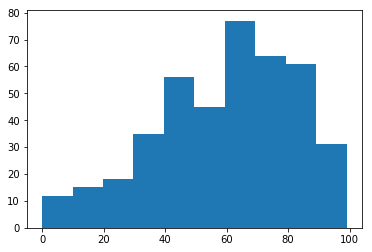

In [37]:
plt.hist(df[df["Lineage"] == "AEGEAN-169"]["Genome completeness (%)"])

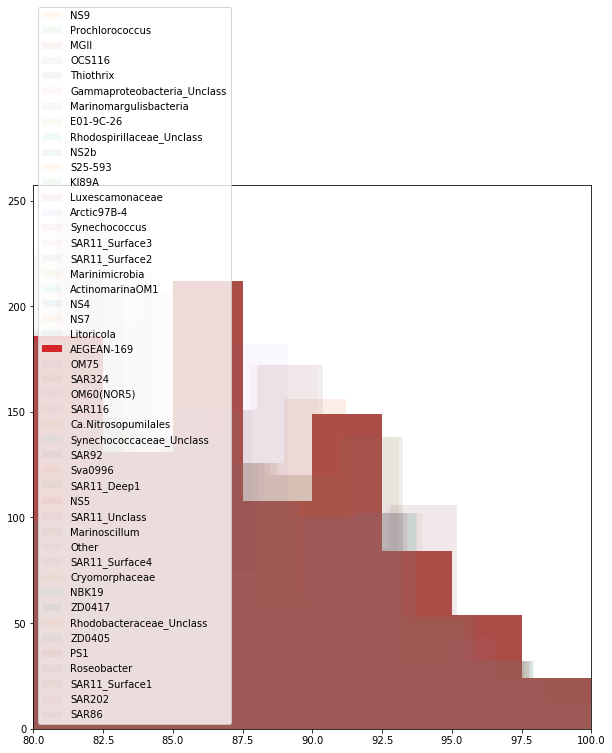

In [86]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')
fig, ax = plt.subplots(figsize=(10, 10))
for l in set(df["Lineage"]):
    #print(l, np.mean(df[df["Lineage"] == l]["Genome completeness (%)"]))
    #print(l, np.mean([locale.atoi(x) for x in df[df["Lineage"] == l]["Raw read count"]]))
    #print(l, np.std([locale.atoi(x) for x in df[df["Lineage"] == l]["Assembly size (bp)"]]))
    lmask = df[np.array(df["Lineage"] == l) + np.array(df["Genome completeness (%)"]>80)]
#        cmask = df[df["Genome completeness (%)" > 80]]
    try:
        alpha=0.05
        if l == "AEGEAN-169": alpha=1
        plt.hist(lmask["Genome completeness (%)"], alpha=alpha, label=l, bins=40)    
    except: pass
plt.xlim(80, 100)
plt.legend()
    

In [108]:
nsamps=10
nspecies=3
dfs = []
for idx in range(nspecies):
    df = pd.DataFrame([
                [idx] * nsamps,
                range(nsamps),
                np.random.normal(0, 10, nsamps),
                np.random.normal(0, 1, nsamps),
                np.random.randint(0, 100, nsamps),
                np.random.choice(["small", "medium", "large"], nsamps),
                ],
                index=["Species_ID", "Sample_ID", "Trait1", "Trait2", "Trait3", "Trait4"]).T
    dfs.append(df)
df = pd.concat(dfs)
df.to_csv("/tmp/watdo.csv", index=False)
!cat /tmp/watdo.csv

Species_ID,Sample_ID,Trait1,Trait2,Trait3,Trait4
0,0,-1.599306412915359,0.6521556351594716,38,small
0,1,-14.140432316229148,-0.044648576889171,87,small
0,2,-12.093566992629128,-1.3551027960235522,68,medium
0,3,2.4283248574942076,0.7175150560786777,55,large
0,4,-5.254414966782414,0.5149098705179866,74,small
0,5,8.237513528261932,1.7290633266824045,17,large
0,6,7.830969901409402,-0.27633847804889167,14,small
0,7,6.268985430720729,0.6981139483168326,6,small
0,8,4.738378592145432,-2.048820725825321,54,small
0,9,13.106016155768929,0.23989863911060333,49,small
1,0,6.298343085080761,-0.08593454850452126,37,medium
1,1,4.2761149895514965,-0.4419159305908065,14,large
1,2,-16.801657056329955,0.7888762650065557,1,small
1,3,-13.765909432212773,1.6424117954521127,96,small
1,4,13.480285938834227,0.05324646687413209,44,large
1,5,15.42422678496434,-0.5250031201483103,96,small
1,6,-1.5853483898660499,0.5987613085213117,98,medium
1,7,9.617016450481305,1.2668457122140862,43,small
1,8,-3.173801221464319,-1

In [112]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
inf = "/home/isaac/Continuosity/NEON/NEON_seq-metabarcode-zooplankton/NEON.D03.BARC.DP1.20221.001.2019-07.expanded.20210123T023002Z.RELEASE-2021/NEON.D03.BARC.DP1.20221.001.zoo_metabarcodeTaxonomy.2019-07.expanded.20201218T153238Z.csv"
df = pd.read_csv(inf)
df

,uid,domainID,siteID,locationID,laboratoryName,startDate,collectDate,processedDate,dnaSampleID,dnaSampleCode,internalLabID,targetTaxonGroup,targetSubfragment,testProtocolVersion,sequencerRunID,sequenceName,taxonSequence,scientificName,phylum,class,order,family,tribe,genus,subgenus,specificEpithet,individualCount,percentSequenceMatch,sequenceTaxaNumber,processedBy,remarks,externalLabDataQF,dataQF
0,3a0708ff-c322-4069-a098-9fcf3ddd8f17,D03,BARC,BARC.AOS.buoy.c0,Jonah Ventures,2019-07-09T15:57Z,2019-07-09T15:57Z,2020-08-20,BARC.20190709.TOWNET.1.DNA.DNA-DNA1,NaN,S020694,zooplankton,BE,JONAHVENTURES_invertebrate_bioinformatics_V1,190923_Devitt_JV-949_JV99,ESV_001796,GATAAATAATATAAGATTTTGATTTTTAATCCCTGCATTAGTAATGTTATTATCAAGGTCCCTTGTAGAAAGAGGAGCAGGGACGGGGTGAACTGTTTATCCCCCCCTATCTAGAAATATCGCGCACGCAGGAAGATCTGTGGATTTTGCTATTTTTTCCCTTCATCTGGCTGGGGTAAGATCTATTTTAGGGGCAGTAAATTTTATTAGAACCTTAGGAAATTTACGAGTGTTTGGAATAATTTT...,Skistodiaptomus mississippiensis,Arthropoda,NaN,Calanoida,Diaptomidae,NaN,Skistodiaptomus,NaN,mississippiensis,28,87.0,1.0,vasco.elbrecht@jonahventures.com,NaN,NaN,NaN
1,301b791e-2a50-4f74-8266-8b759fdedfa4,D03,BARC,BARC.AOS.buoy.c0,Jonah Ventures,2019-07-09T15:57Z,2019-07-09T15:57Z,2020-08-20,BARC.20190709.TOWNET.1.DNA.DNA-DNA1,NaN,S020694,zooplankton,BE,JONAHVENTURES_invertebrate_bioinformatics_V1,190923_Devitt_JV-949_JV99,ESV_002108,GATAAATAATATAAGATTTTGATTTTTAATCCCTGCATTAGTAATGTTATTATCAAGGTCCCTTGTAGAAAGAGGAGCAGGGACGGGGTGAACTGTTTATCCCCCCCTATCTAGAAATATCGCGCACGCAGGAAGATCTGTGGATTTTGCTATTTTTTCCCTTCATCTGGCTGGGGTAAGATCTATTTTAGGGGCAGTAAATTTTATTAGGACCTTAGGAAATTTACGAGTGTTTGGGATAATTTT...,Skistodiaptomus mississippiensis,Arthropoda,NaN,Calanoida,Diaptomidae,NaN,Skistodiaptomus,NaN,mississippiensis,32,87.0,1.0,vasco.elbrecht@jonahventures.com,NaN,NaN,NaN
2,cb85da35-9b71-4f94-adeb-fd51416c6afc,D03,BARC,BARC.AOS.buoy.c0,Jonah Ventures,2019-07-09T15:57Z,2019-07-09T15:57Z,2020-08-20,BARC.20190709.TOWNET.1.DNA.DNA-DNA1,NaN,S020694,zooplankton,BE,JONAHVENTURES_invertebrate_bioinformatics_V1,190923_Devitt_JV-949_JV99,ESV_001110,TATAAATAATATAAGGTTTTGATTTTTAATTTCTTCGTTGATTATACTTTTATTAAGATCTTTAGTAGAGAGAGGGGCAGGAACAGGTTGAACTGTCTACCCCCCCTTAAGAGGGAATATCGCTCATGGGGGGAGATCAGTAGATTACGCAATCTTTTCTTTACACTTAGCTGGGGTATCTTCAATTTTAGGCGCTGTAAACTTTATTAGGACGTTAAGAAATCTACGTAGATTCGGAATAAGCGG...,NaN,Arthropoda,NaN,Cyclopoida,Cyclopidae,NaN,NaN,NaN,NaN,11,83.0,2.0,vasco.elbrecht@jonahventures.com,NaN,NaN,NaN
3,1aae646e-f2ca-47e7-b970-4d720258307c,D03,BARC,BARC.AOS.buoy.c0,Jonah Ventures,2019-07-09T15:57Z,2019-07-09T15:57Z,2020-08-20,BARC.20190709.TOWNET.1.DNA.DNA-DNA1,NaN,S020694,zooplankton,BE,JONAHVENTURES_invertebrate_bioinformatics_V1,190923_Devitt_JV-949_JV99,ESV_005367,GATAAATAATATAAGATTTTGATTTTTAATCCCTGCATTAGTAATGTTATTATCAAGGTCCCTTGTAGAAAGAGGAGCAGGGACGGGGTGAACTGTTTATCCCCCCCTATCTAGAAATATCGCGCACGCAGGAAGATCTGTGGATTTTGCTATTTTTTCCCTTCATCTGGCTGGGGTAAGATCTATTTTAGGGGCAGTAAATTTTATTAGGACCTTAGGAAATTTACGAGTGTTTGGAATAATTTT...,Skistodiaptomus mississippiensis,Arthropoda,NaN,Calanoida,Diaptomidae,NaN,Skistodiaptomus,NaN,mississippiensis,15,86.0,1.0,vasco.elbrecht@jonahventures.com,NaN,NaN,NaN
4,d91ae858-de8a-4f23-8132-c6a92df20379,D03,BARC,BARC.AOS.buoy.c0,Jonah Ventures,2019-07-09T15:57Z,2019-07-09T15:57Z,2020-08-20,BARC.20190709.TOWNET.1.DNA.DNA-DNA1,NaN,S020694,zooplankton,BE,JONAHVENTURES_invertebrate_bioinformatics_V1,190923_Devitt_JV-949_JV99,ESV_001141,AATAAATAATATAAGGTTTTGATTTTTAATTCCAGCTCTGTTTATACTCTTGACAAGCTCTTTAGTAGAAAGAGGAGCAGGAACAGGATGAACTGTGTACCCTCCTTTAAGAAGCAATTTATCTCATTCAGGATCTTCAGTAGATTACGCTATTTTTTCCCTACATCTAGCTGGGGTTTCTTCTATTTTAGGAGCTGTAAATTTTATTAGGACTGTGGGTAATATACGGACTTTAGGAATATTCTT...,NaN,Arthropoda,NaN,Cyclopoida,Cyclopidae,NaN,Cyclops,NaN,NaN,140,93.0,38.0,vasco.elbrecht@jonahventures.com,NaN,NaN,NaN
5,a81c2754-2f7c-48e9-afe4-310028c7b5d7,D03,BARC,BARC.AOS.buoy.c0,Jonah Ventures,2019-07-09T15:57Z,2019-07-09T15:57Z,2020-08-20,BARC.20190709.TOWNET.1.DNA.DNA-DNA1,NaN,S020694,zooplankton,BE,JONAHVENTURES_invertebrate_bioinformatics_V1,190923_Devitt_JV-9